# Vectors
This notebook discusses the basic properties of vectors and their products

Let begin by defining some vectors $\tilde{a}$ and $\tilde{b}$

In [144]:
import numpy as np

#vectors
origin = [0, 0]
a = np.array([4, 1])
b = np.array([1, 3])
#b = np.array([-1, 4])

#extract values for plotting, let's make it into a function, 
#so we dont keep repeating it over and over
def getCoordinates(vectors):
    V = np.array(vectors) #create a matrix of the vectors
    maxValue = V.max()+1 #too scale plot automatically
    x = V[:,0] #x coordinates, column 0
    y = V[:,1] #y coordinates, column 1
    
    return x, y, maxValue

originX, originY, maxValue = getCoordinates([origin, origin]) # tail locations per vector
X, Y, maxValue = getCoordinates([a, b])
colours = ['r', 'b']


Plot the vectors

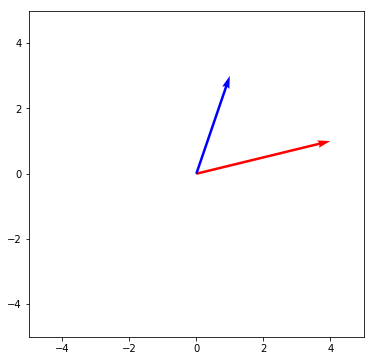

In [145]:
import matplotlib.pyplot as plt

#use the quiver plot capability of matplotlib
plt.figure(figsize=(6,6)) #prevent a skewed view
plt.quiver(originX, originY, X, Y, color=colours, angles='xy', scale_units='xy', scale=1)
plt.xlim(-maxValue, maxValue)
plt.ylim(-maxValue, maxValue)
plt.show()

### Vector Arithmetic
Let's do some simple arithmetic of vectors $\tilde{c}=\tilde{a}+\tilde{b}$, $\tilde{d}=\tilde{a}-\tilde{b}$, $\tilde{e}=2\cdot\tilde{a}$. What are the results?

In [146]:
c = a+b
d = a-b
e = 2*a
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)
print("e:", e)

originX, originY, maxValue = getCoordinates([origin, origin, origin]) # tail locations per vector
X, Y, maxValue = getCoordinates([c, d, e])

a: [4 1]
b: [1 3]
c: [5 4]
d: [ 3 -2]
e: [8 2]


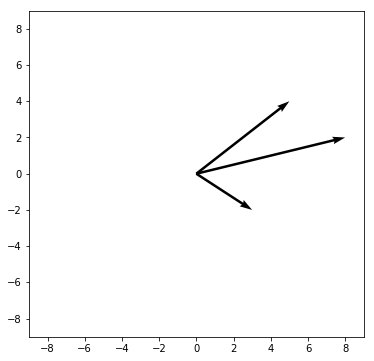

In [147]:
#use the quiver plot capability of matplotlib
plt.figure(figsize=(6,6)) #prevent a skewed view
plt.quiver(originX, originY, X, Y, angles='xy', scale_units='xy', scale=1)
plt.xlim(-maxValue, maxValue)
plt.ylim(-maxValue, maxValue)
plt.show()

### Vector Products
How do we multiply vectors though? We get the dot product or the inner product $\tilde{a}\cdot\tilde{b}$

In [148]:
import math

#dot or inner product
f = np.dot(a, b) 

#project b onto a
#compute angle between them
theta = math.atan(b[1]/b[0]) - math.atan(a[1]/a[0]) #atan is arctan function
#project
b_a = np.linalg.norm(b)*math.cos(theta)
print("b_a:", b_a)

#compare with projection of vector
g = np.linalg.norm(a)*b_a
#print("a:", np.linalg.norm(a))
#print("b:", np.linalg.norm(b))
print("f:", f)
print("g:", g)

b_a: 1.69774937525
f: 7
g: 7.0


Lets plot the results to see what has happened

In [149]:
aUnit = a/np.linalg.norm(a)
h = b_a*aUnit

originX, originY, maxValue = getCoordinates([origin, origin, origin]) # tail locations per vector
X, Y, maxValue = getCoordinates([a, b, h])
colours = ['r', 'b', 'g']

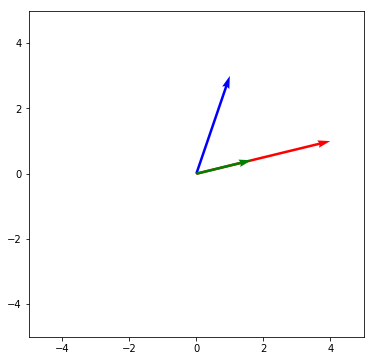

In [150]:
#use the quiver plot capability of matplotlib
plt.figure(figsize=(6,6)) #prevent a skewed view
plt.quiver(originX, originY, X, Y, color=colours, angles='xy', scale_units='xy', scale=1)
plt.xlim(-maxValue, maxValue)
plt.ylim(-maxValue, maxValue)
plt.show()

So the dot/inner product is a scaled projection of the vector onto the other, i.e. the amount that $\tilde{b}$ has in common with $\tilde{a}$. Important case to consider: $\tilde{a}\cdot\tilde{a}$, which gives the length of the vector squared.

In [151]:
print("a norm:", np.linalg.norm(a))
print("a dot a:", math.sqrt(np.dot(a, a)))

a norm: 4.12310562562
a dot a: 4.123105625617661


Let us define our own inner product as $\sum_i^N a_i b_i$, where $N$ is the length (or dimension) of the vectors.

In [152]:
def inner_product(a, b):
    total = 0
    for i, value in enumerate(a):
        total += a[i]*b[i]
        
    return total

print("a dot a:", math.sqrt(np.dot(a, a)))
print("a inner:", math.sqrt(inner_product(a, a)))

a dot a: 4.123105625617661
a inner: 4.123105625617661


In [153]:
print("a dot a:", math.sqrt(np.dot(a, b)))
print("a inner:", math.sqrt(inner_product(a, b)))

a dot a: 2.6457513110645907
a inner: 2.6457513110645907


So taking the inner product is the same as projecting $\tilde{a}$ onto $\tilde{a}$ and scaling it by $\tilde{a}$. If the norm is of $\tilde{a}$ is a unit, i.e. $|\tilde{a}|=1$ so it is a unit vector, then it is exactly the same as projecting $\tilde{b}$ onto $\tilde{a}$. If the vectors $\tilde{a}$ and $\tilde{b}$ are perpendicular to each other, then they have nothing in common, their dot product is zero and they are referred to as orthogonal vectors.

We will see that if we choose a set of special vectors, which are unit and mutually orthogonal, we can create 'transforms' to see how much a vector (or signal in our case) has common with these special vectors using the inner product with all vectors in this special set. If the vectors are the complex-valued harmonics, we will have a Fourier transform!